### MULTI LAYER PERCEPTRON (iris.csv)

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas import DataFrame

#### getting dataset

In [2]:
df = pd.read_csv('datasets/Iris.csv')
df = df.drop(['Id'], axis=1)
cols = list(df.columns[:-1])
print(cols)
print(df)
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
if pd.isnull(df).values.any() == True:
    print('missing values exist')
else:
    print('no missing values')


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virgini

#### one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y = DataFrame(y, columns =['Species'])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Species'])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)

#### training-testing (80/20)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#always fit_transform on training set and as testing set is unseen, we'll use transform to normalise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### training our multilayer perceptron model

In [6]:
cols_train = X_train.shape[1]

# #input neorons = 4, # hidden neurons = 8, #output neurons = 3
mlp = MLPClassifier(hidden_layer_sizes=(cols_train,8,3),max_iter=10000,random_state=0)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 8, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### predicting y and geting accuracy score for our model

accuracy of MLP with hidden layers: 0.9666666666666667


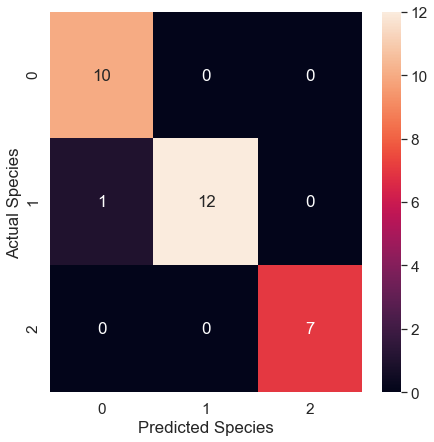

In [7]:
y_pred =mlp.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("accuracy of MLP with hidden layers: {}".format(acc))

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm
plt.figure(figsize = (7, 7))
sn.set(font_scale=1.4) # for label size
cm_hm = sn.heatmap(cm, annot=True)
bottom, top = cm_hm.get_ylim()
cm_hm.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()